In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
# clean and process it, perform statisical analysis, and generate visual insights to help the
# business make informed decisions.

# 1. Use your roll number as the random seed to generate unique data for each student.
# 2. Follow the questions step by step, as each part builds upon the previous one.
# 3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
#   a. Well-documented code and clear comments.
#   b. Markdown explanations for each step.
#   c. Screenshots of the plots and outputs.


# Part I: Randomized Sales Data Generation (NumPy)
# 1. Initialize Random Seed
np.random.seed(102317101)

In [3]:

# 2. Generate Sales Data
#   a.Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
#   where each column represents a product category:
#   b.Electronics, Clothing, Home & Kitchen, Sports.
#   c.Sales values should be between 1000 and 5000 units per month.
#   d.The range should be randomized using the seed.

sales_data=np.random.randint(1000,5000,size=(12,4))
months=["jan","feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"]
category=["Electronics", "Clothing", "Home & Kitchen", "Sports"]


In [4]:

# 3.Convert to DataFrame
#   a. Convert the cleaned NumPy array into a Pandas DataFrame with:
#     i. Columns: Electronics, Clothing, Home & Kitchen, Sports
#     ii. Index: Months from Jan to Dec
df=pd.DataFrame(sales_data,columns=category,index=months)
df.head()


,Electronics,Clothing,Home & Kitchen,Sports
jan,1533,1457,4055,3487
feb,3344,3867,2264,4410
mar,4089,2215,2252,3339
apr,4913,3422,3187,4509
may,3409,2417,1522,1197


In [5]:
# Part II: Data Manipulation and Analysis (Pandas)
# 1. Display the first 5 rows and summary statistics of the DataFrame.
print(df.head(5),'\n')
print(df.describe,'\n')

# 2. Calculate the total sales per category and total sales per month.
print("Total sales per category:\n",df.sum())
print("Total sales per month :\n",df.sum(axis=1))

# 3. Calculate the average sales growth between consecutive months for each category.
growth_rate={}
for col in df.columns:
  gr=0
  for i in range(1,len(df)):
    gr+=(df[col].iloc[i]-df[col].iloc[i-1])/(df[col].iloc[i-1])

  gr=gr/(len(df)-1)
  growth_rate[col]=gr

growth_rate=pd.DataFrame(list(growth_rate.items()))
print(growth_rate,'\n')

# 4. Add the following columns to the DataFrame:
#   a.Total Sales: Sum of all categories per month.
df['Total Sales']=df.sum(axis=1)

#   b.Growth Rate: Percentage change in Total Sales from the previous month.
growth_rates2=[0]
for i in range(1,len(df)):
    gr=(df["Total Sales"].iloc[i]-df["Total Sales"].iloc[i-1])/(df["Total Sales"].iloc[i-1])
    growth_rates2.append(gr)
df["Growth Rate"] = growth_rates2
print(df.head(),'\n')

# 5. Apply a randomized discount:
#   a.If your roll number is even, apply a 10% discount to the Electronics category.
#   b.If odd, apply a 15% discount to the Clothing category.

rn=102317096
if(rn%2==0):
  df["Electronics"]*=0.9
else:
  df['Clothing']*=0.85

print(df.head())


     Electronics  Clothing  Home & Kitchen  Sports
jan         1533      1457            4055    3487
feb         3344      3867            2264    4410
mar         4089      2215            2252    3339
apr         4913      3422            3187    4509
may         3409      2417            1522    1197 

<bound method NDFrame.describe of       Electronics  Clothing  Home & Kitchen  Sports
jan          1533      1457            4055    3487
feb          3344      3867            2264    4410
mar          4089      2215            2252    3339
apr          4913      3422            3187    4509
may          3409      2417            1522    1197
june         2896      4075            3386    1829
july         1694      3357            1757    1202
aug          4168      1637            2619    2353
sept         4874      2175            4196    3086
oct          4830      3665            1974    1696
nov          2526      1042            2103    3069
dec          4934      2224       

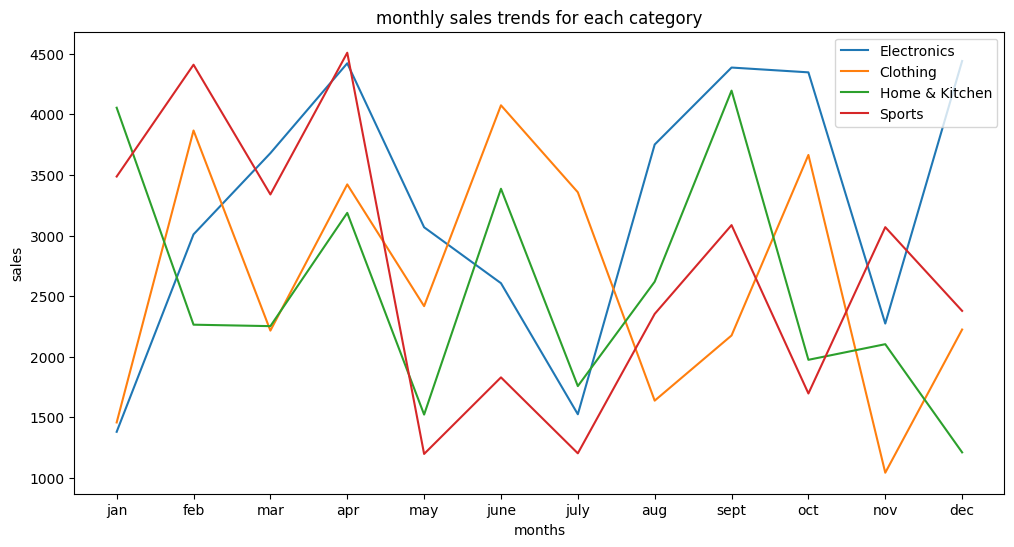

In [6]:


# Part III: Visualizations (Matplotlib and Seaborn)
# 1. Plot monthly sales trends for each category using line plots.
plt.figure(figsize=(12,6))
for col in category:
  plt.plot(df.index,df[col],label=col)

plt.title("monthly sales trends for each category")
plt.xlabel("months")
plt.ylabel("sales")
plt.legend()
plt.show()

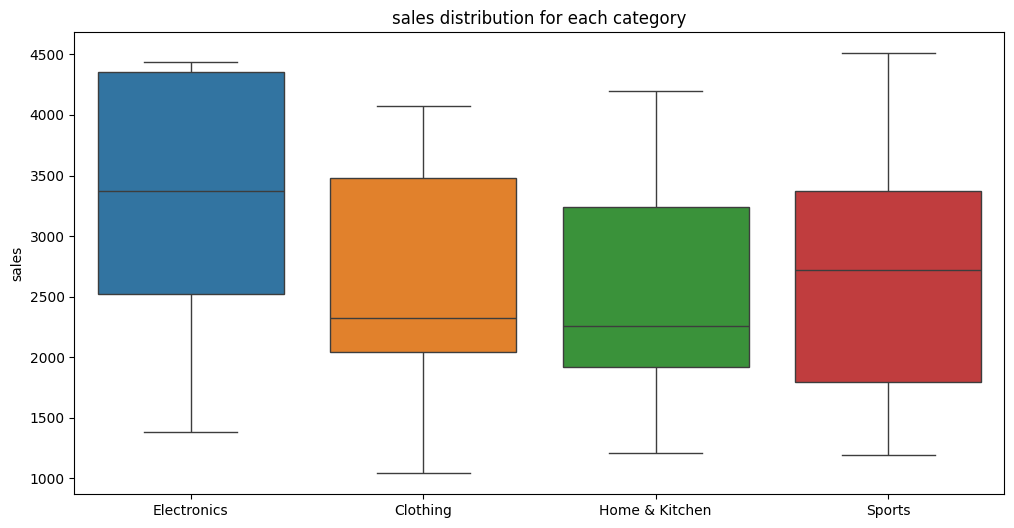

In [7]:
# 2. Create the following plots:
#     Box plots to show the sales distribution for each category.
plt.figure(figsize=(12,6))
sns.boxplot(data=df[category])

plt.title("sales distribution for each category")
plt.ylabel("sales")
plt.show()

In [8]:
# Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
arr=np.array([[1,-2,3],[-4,5,-6]])
print(arr,'\n')
# i. Find element-wise absolute value
print(np.abs(arr),'\n')
# ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each row.
pf=np.percentile(arr,[25,50,75])
print(pf,'\n')
pr=np.percentile(arr,[25,50,75],axis=1)
print(pr,'\n')
pc=np.percentile(arr,[25,50,75],axis=0)
print(pc,'\n')
# iii. Mean, Median and Standard Deviation of flattened array, of each column, and each row
mean_f=np.mean(arr)
median_f=np.median(arr)
std_f=np.std(arr)

print(mean_f,median_f,std_f,'\n')

mean_c=np.mean(arr,axis=0)
median_c=np.median(arr,axis=0)
std_c=np.std(arr,axis=0)

print(mean_c,median_c,std_c,'\n')

mean_r=np.mean(arr,axis=1)
median_r=np.median(arr,axis=1)
std_r=np.std(arr,axis=1)

print(mean_r,median_r,std_r,'\n')

[[ 1 -2  3]
 [-4  5 -6]] 

[[1 2 3]
 [4 5 6]] 

[-3.5 -0.5  2.5] 

[[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]] 

[[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]] 

-0.5 -0.5 3.8622100754188224 

[-1.5  1.5 -1.5] [-1.5  1.5 -1.5] [2.5 3.5 4.5] 

[ 0.66666667 -1.66666667] [ 1. -4.] [2.05480467 4.78423336] 



In [9]:
# Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
# i. Find floor, ceiling and truncated value, rounded values

a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0])
print(a,'\n')

f=np.floor(a)
c=np.ceil(a)
t=np.trunc(a)
r=np.round(a)

print("floor values : ",f)
print("ceiling values : ",c)
print("truncated values : ",t)
print("round values : ",r)

     

[-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ] 

floor values :  [-2. -2. -1.  0.  1.  1.  3.]
ceiling values :  [-1. -1. -0.  1.  2.  2.  3.]
truncated values :  [-1. -1. -0.  0.  1.  1.  3.]
round values :  [-2. -2. -0.  0.  2.  2.  3.]


In [10]:

# Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.
def swap(list1,i,j):
  temp=list1[i]
  list1[i]=list1[j]
  list1[j]=temp
  return list1

list1=[1,2,3,4]
print(list1)

swap(list1,1,3)
print(list1)

[1, 2, 3, 4]
[1, 4, 3, 2]


In [11]:
# Q.5 Write a Python program to swap two elements in a set by converting it to a list first.
def swap2(s,i,j):
  l=list(s)
  return set(swap(l,i,j))

s={12,22,31,45}
print(s)
swap2(s,1,3)
print(s)

{12, 45, 22, 31}
{12, 45, 22, 31}
